# Introduction to Machine Learning with Scikit Learn

An introduction to machine learning.

# Linear Regression
Method:

In [1]:
def least_squares(data):
    x_sum = 0
    y_sum = 0
    x_sq_sum = 0
    xy_sum = 0

    # the list of data should have two equal length columns
    assert len(data) == 2
    assert len(data[0]) == len(data[1])

    n = len(data[0])
    # least squares regression calculation
    for i in range(0, n):
        x = int(data[0][i])
        y = data[1][i]
        x_sum = x_sum + x
        y_sum = y_sum + y
        x_sq_sum = x_sq_sum + (x**2)
        xy_sum = xy_sum + (x*y)

    m = ((n * xy_sum) - (x_sum * y_sum))
    m = m / ((n * x_sq_sum) - (x_sum ** 2))
    c = (y_sum - m * x_sum) / n

    print("Results of linear regression:")
    print("x_sum=", x_sum, "y_sum=", y_sum, "x_sq_sum=", x_sq_sum, "xy_sum=",
          xy_sum)
    print("m=", m, "c=", c)

    return m, c

Sample Input:

In [2]:
x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]
least_squares([x_data,y_data])

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


(1.5182926829268293, 0.30487804878048763)

# Measuring Error of a Regression Model:
Method:

In [3]:
import math
def measure_error(data1, data2):

    assert len(data1) == len(data2)
    err_total = 0
    for i in range(0, len(data1)):
        err_total = err_total + (data1[i] - data2[i]) ** 2

    err = math.sqrt(err_total / len(data1))
    return err

Sample Input:

In [4]:
# get the m and c values from the least_squares function
m, c = least_squares([x_data, y_data])

# create an empty list for the model y data
linear_data = []

for x in x_data:
    y = m * x + c
    # add the result to the linear_data list
    linear_data.append(y)

# calculate the error
print(measure_error(y_data,linear_data))

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763
0.7986268703523449


# Graphing Data
with matplotlib

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


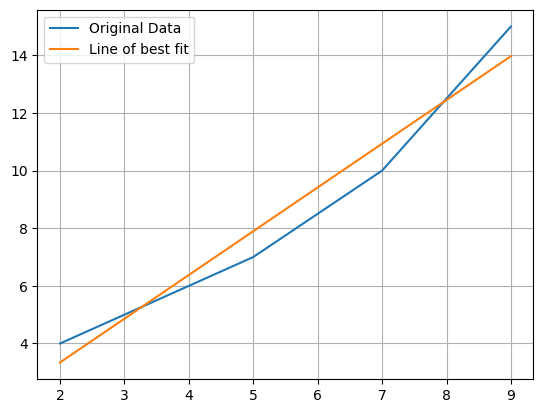

In [5]:
import matplotlib.pyplot as plt

def calculate_linear(x_data, m, c):
    linear_data = []
    for x in x_data:
        y = m * x + c
        #add the result to the linear_data list
        linear_data.append(y)
    return(linear_data)

def make_graph(x_data, y_data, linear_data):
    plt.plot(x_data, y_data, label="Original Data")
    plt.plot(x_data, linear_data, label="Line of best fit")

    plt.grid()
    plt.legend()

    plt.show()

x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]

m, c = least_squares([x_data, y_data])
linear_data = calculate_linear(x_data, m, c)
make_graph(x_data, y_data, calculate_linear(x_data, m, c))

# Regression with real data
Life expectancy

/var/folders/mr/fcr4_q2x7r92n0ld8cqw51g00000gn/T/ipykernel_6660/2978317442.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data[1][i]
/var/folders/mr/fcr4_q2x7r92n0ld8cqw51g00000gn/T/ipykernel_6660/2809039438.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  err_total = err_total + (data1[i] - data2[i]) ** 2


Results of linear regression:
x_sum= 120780 y_sum= 4517.97 x_sq_sum= 239163310 xy_sum= 8948996.020000003
m= 0.18061448968810326 c= -283.55160761523126
error is  0.43031030016263333


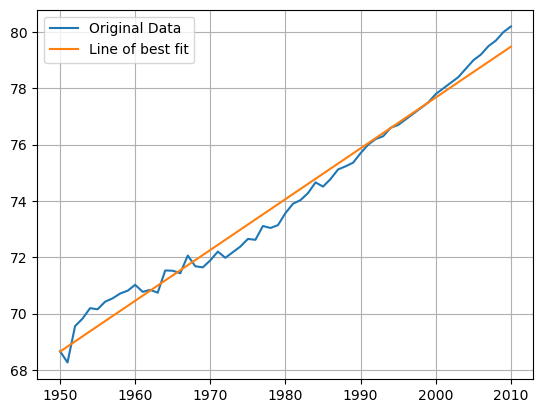

In [6]:
import pandas as pd

def process_life_expectancy_data(filename, country, min_date, max_date):
    df = pd.read_csv(filename, index_col="Life expectancy")

    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df.loc[country, str(min_date):str(max_date)]

    # create a list with the numerical range of min_date to max_date
    # we could use the index of life_expectancy but it will be a string
    # we need numerical data
    x_data = list(range(min_date, max_date + 1))

    # calculate line of best fit
    m, c = least_squares([x_data, life_expectancy])
    linear_data = calculate_linear(x_data, m, c)

    error = measure_error(life_expectancy, linear_data)
    print("error is ", error)

    make_graph(x_data, life_expectancy, linear_data)

process_life_expectancy_data("../hurwitzlab/gapminder-life-expectancy.csv",
                             "United Kingdom", 1950, 2010)

Loading the Data

In [7]:
def read_data(gdp_file, life_expectancy_file, year):
    df_gdp = pd.read_csv(gdp_file, index_col="Country Name")

    gdp = df_gdp.loc[:, year]

    df_life_expt = pd.read_csv(life_expectancy_file,
                               index_col="Life expectancy")

    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df_life_expt.loc[:, year]

    data = []
    for country in life_expectancy.index:
        if country in gdp.index:
            # exclude any country where data is unknown
            if (math.isnan(life_expectancy[country]) is False) and \
               (math.isnan(gdp[country]) is False):
                    data.append((country, life_expectancy[country],
                                 gdp[country]))
            else:
                print("Excluding ", country, ",NaN in data (life_exp = ",
                      life_expectancy[country], "gdp=", gdp[country], ")")
        else:
            print(country, "is not in the GDP country data")

    combined = pd.DataFrame.from_records(data, columns=("Country",
                                         "Life Expectancy", "GDP"))
    combined = combined.set_index("Country")
    # we'll need sorted data for graphing properly later on
    combined = combined.sort_values("Life Expectancy")
    return combined

Processing the Data

In [8]:
def process_data(gdp_file, life_expectancy_file, year):
    data = read_data(gdp_file, life_expectancy_file, year)

    gdp = data["GDP"].tolist()
    gdp_log = data["GDP"].apply(math.log).tolist()
    life_exp = data["Life Expectancy"].tolist()

    m, c = least_squares([life_exp, gdp_log])

    # list for logarithmic version
    log_data = []
    # list for raw version
    linear_data = []
    for x in life_exp:
        y_log = m * x + c
        log_data.append(y_log)

        y = math.exp(y_log)
        linear_data.append(y)

    # uncomment for log version, further changes needed in make_graph too
    # make_graph(life_exp, gdp_log, log_data)
    make_graph(life_exp, gdp, linear_data)

    err = measure_error(linear_data, gdp)
    print("error=", err)

Reworking least squares function to handle floats

In [9]:
def least_squares(data):
    x_sum = 0
    y_sum = 0
    x_sq_sum = 0
    xy_sum = 0

    # the list of data should have two equal length columns
    assert len(data) == 2
    assert len(data[0]) == len(data[1])

    n = len(data[0])
    # least squares regression calculation
    for i in range(0, n):
        x = data[0][i]
        y = data[1][i]
        x_sum = x_sum + x
        y_sum = y_sum + y
        x_sq_sum = x_sq_sum + (x**2)
        xy_sum = xy_sum + (x*y)

    m = ((n * xy_sum) - (x_sum * y_sum))
    m = m / ((n * x_sq_sum) - (x_sum ** 2))
    c = (y_sum - m * x_sum) / n

    print("Results of linear regression:")
    print("x_sum=", x_sum, "y_sum=", y_sum, "x_sq_sum=", x_sq_sum, "xy_sum=",
          xy_sum)
    print("m=", m, "c=", c)

    return m, c

Excluding  Afghanistan ,NaN in data (life_exp =  41.96 gdp= nan )
Excluding  American Samoa ,NaN in data (life_exp =  nan gdp= nan )
Excluding  Andorra ,NaN in data (life_exp =  nan gdp= 40495.698015877 )
Excluding  Armenia ,NaN in data (life_exp =  72.72 gdp= nan )
Excluding  Aruba ,NaN in data (life_exp =  72.29 gdp= nan )
Excluding  Azerbaijan ,NaN in data (life_exp =  65.55 gdp= nan )
Excluding  Belarus ,NaN in data (life_exp =  70.57 gdp= nan )
Excluding  Bermuda ,NaN in data (life_exp =  nan gdp= 61083.4509496361 )
Excluding  Bosnia and Herzegovina ,NaN in data (life_exp =  74.82 gdp= nan )
Excluding  British Virgin Islands ,NaN in data (life_exp =  nan gdp= nan )
Brunei is not in the GDP country data
Excluding  Cambodia ,NaN in data (life_exp =  28.16 gdp= nan )
Cape Verde is not in the GDP country data
Excluding  Cayman Islands ,NaN in data (life_exp =  nan gdp= nan )
Excluding  Channel Islands ,NaN in data (life_exp =  73.44 gdp= nan )
Christmas Island is not in the GDP countr

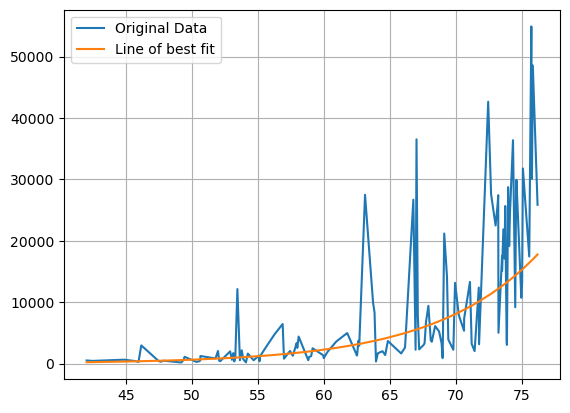

error= 8741.124994224838


In [10]:
process_data("../hurwitzlab/worldbank-gdp.csv",
             "../hurwitzlab/gapminder-life-expectancy.csv", "1980")

# Final Graph

In [11]:
def make_graph(x_data, y_data, linear_data):
    plt.scatter(x_data, y_data, label="Original Data")
    plt.plot(x_data, linear_data, color="orange", label="Line of best fit")

    plt.grid()
    plt.legend()

    plt.show()